# Objetivo
Neste trabalho, você implementará e avaliará três diferentes algoritmos de regressão para prever uma variável dependente. Ao final, você comparará o desempenho desses algoritmos e identificará qual deles se mostrou mais eficaz.



In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Coleta de Dados: 
Selecione uma base de dados adequada para problemas de regressão. A base deve conter pelo menos uma variável dependente e uma ou mais variáveis independentes.

In [2]:
df = pd.read_csv('HousePrices.csv', delimiter=';')
df

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


# Pré-processamento de Dados:

**Elementos Faltantes:** Trate os elementos faltantes na base de dados, se houver.

**Variáveis Categóricas:** Converta variáveis categóricas em numéricas, se necessário.

**Normalização:** Normalize as variáveis, caso seja necessário.

**Separação de Dados:** Divida a base em conjuntos de treino e teste.

In [3]:
print(f"Elementos faltantes:\n{df.isna().sum()}") #Não há elementos faltantes

scaler = MinMaxScaler()
df[['area','garagem', 'banheiros', 'lareira', 'marmore', 'andares']] = scaler.fit_transform(df[['area','garagem', 'banheiros', 'lareira', 'marmore', 'andares']])

XTrainSimple, XTestSimple, yTrainSimple, yTestSimple = train_test_split(df['area'], df['precos'], test_size = 0.2)
XTrainMultiple, XTestMultiple, yTrainMultiple, yTestMultiple = train_test_split(df[['area','garagem', 'banheiros', 'lareira', 'marmore', 'andares']], df['precos'], test_size = 0.8)

XTestSimple = pd.DataFrame(XTestSimple)
XTrainSimple = pd.DataFrame(XTrainSimple)

print(df)

Elementos faltantes:
precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64
     precos      area  garagem  banheiros  lareira  marmore  andares
0     51875  0.096774      1.0       0.75     0.75      0.0      1.0
1     17875  0.137097      0.0       0.50     0.25      0.0      0.0
2     47075  0.782258      0.5       0.75     0.50      0.0      0.0
3     38575  0.129032      0.5       0.25     0.25      0.0      1.0
4     33775  0.040323      0.5       0.50     0.00      0.0      1.0
..      ...       ...      ...        ...      ...      ...      ...
995   29150  0.189516      0.0       1.00     1.00      0.0      0.0
996   43550  0.447581      0.5       0.25     0.75      0.0      1.0
997   56575  0.741935      1.0       0.75     1.00      0.0      1.0
998   56075  0.741935      0.5       0.50     0.25      0.0      1.0
999   13350  0.375000      0.0       0.00     0.75      0.0      0.0

[1000 rows x 7 columns]


# Implementação e Treino:
Implemente e treine três algoritmos de regressão diferentes (por exemplo, Regressão Linear, Regressão Polinomial e Regressão por Floresta Randômica).

In [4]:
#Regressão Linear
regressorLinear = LinearRegression()
XTrain = pd.DataFrame(XTrainSimple) #Aqui, o conteúdo de XTrain está em formato unidimensional(série), o método fit do regressor exige que XTrain tenha estrutura bidimensional(dataframe).
regressorLinear.fit(XTrainSimple, yTrainSimple)

#Regressão Polinomial Múltipla
poly = PolynomialFeatures(degree=2)  
XPoly = poly.fit_transform(XTrainMultiple)
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(XPoly, yTrainMultiple)

#Regressão Linear Múltipla
regressorLinearMultiplo = LinearRegression()
regressorLinearMultiplo.fit(XTrainMultiple, yTrainMultiple)

LinearRegression()

# Avaliação de Modelos
* Use o conjunto de teste para fazer previsões com cada um dos modelos treinados.

In [5]:
#Regressão Linear
yPredLinear = regressorLinear.predict(XTestSimple)
dfResultadoLinear = pd.DataFrame(yTestSimple)
dfResultadoLinear['Predição'] = yPredLinear
print(dfResultadoLinear)

#Regressão Polinomial Múltipla
XTestPoly = poly.transform(XTestMultiple)
yPredPolinomial = regressorPolinomial.predict(XTestPoly)
dfResultadoPolinomial = pd.DataFrame(yTestMultiple)
dfResultadoPolinomial['Predição'] = yPredPolinomial
print(dfResultadoPolinomial)

#Regressão Linear Múltipla
yPredLinearMultipla = regressorLinearMultiplo.predict(XTestMultiple)
dfResultadoLinearMultipla = pd.DataFrame(yTestMultiple)
dfResultadoLinearMultipla['Predição'] = yPredLinearMultipla
print(dfResultadoLinearMultipla)

     precos      Predição
642   58825  41681.908579
312   43775  42379.069007
341   60650  43571.580265
87    51800  42360.722680
42    43475  42122.220428
..      ...           ...
90    55900  41333.328364
722   43225  41755.293887
830   16575  42012.142466
475   57925  43589.926592
688   45950  41003.094477

[200 rows x 2 columns]
     precos      Predição
601   38225  35467.196464
936   22575  32198.787143
412   44425  42297.844793
164   44625  48899.903110
642   58825  57701.114377
..      ...           ...
219   63175  55364.098525
410   56225  53348.841823
510   47225  53607.803792
864   39275  30821.439014
477   25050  27000.428881

[800 rows x 2 columns]
     precos      Predição
601   38225  33073.141629
936   22575  33758.692361
412   44425  38009.197199
164   44625  49325.824578
642   58825  58240.797289
..      ...           ...
219   63175  55026.233152
410   56225  55109.055717
510   47225  54039.735208
864   39275  30566.248288
477   25050  29732.136855

[800 rows x 2 c

# Avaliação de Modelos
* Calcule métricas de avaliação como RMSE e MAE para cada modelo.

# Comparação de Desempenho:

* Compare as métricas de avaliação entre os três modelos.

* Identifique qual algoritmo teve o melhor desempenho e justifique sua escolha.

In [6]:
#Regressão Linear
mseLinear = mean_squared_error(dfResultadoLinear["precos"], dfResultadoLinear["Predição"])
rmseLinear = np.sqrt(mseLinear)
print("Linear (Pior Desempenho):")
print(f"RMSE: {rmseLinear}")
diferencaLinear = abs(dfResultadoLinear["Predição"] - dfResultadoLinear["precos"])
maeLinear = diferencaLinear.mean()
print(f"MAE: {maeLinear}\n")


#Regressão Polinomial
msePolinomial = mean_squared_error(dfResultadoPolinomial["precos"], dfResultadoPolinomial["Predição"])
rmsePolinomial = np.sqrt(msePolinomial)
print("Polinomial (Melhor Desempenho):")
print(f"RMSE: {rmsePolinomial}")
diferencaPolinomial = abs(dfResultadoPolinomial["Predição"] - dfResultadoPolinomial["precos"])
maePolinomial = diferencaPolinomial.mean()
print(f"MAE: {maePolinomial}\n")


#Regressão Linear Múltipla
mseLinearMultipla = mean_squared_error(dfResultadoLinearMultipla["precos"], dfResultadoLinearMultipla["Predição"])
rmseLinearMultipla = np.sqrt(mseLinearMultipla)
print("Linear Múltipla:")
print(f"RMSE: {rmseLinearMultipla}")
diferencaLinearMultipla = abs(dfResultadoLinearMultipla["Predição"] - dfResultadoLinearMultipla["precos"])
maeLinearMultipla = diferencaLinearMultipla.mean()
print(f"MAE: {maeLinearMultipla}")

Linear (Pior Desempenho):
RMSE: 11987.07438644173
MAE: 9902.90114231392

Polinomial (Melhor Desempenho):
RMSE: 7721.066072886427
MAE: 6458.876445113805

Linear Múltipla:
RMSE: 7399.095871751676
MAE: 6275.354077024443


# Visualização Linear

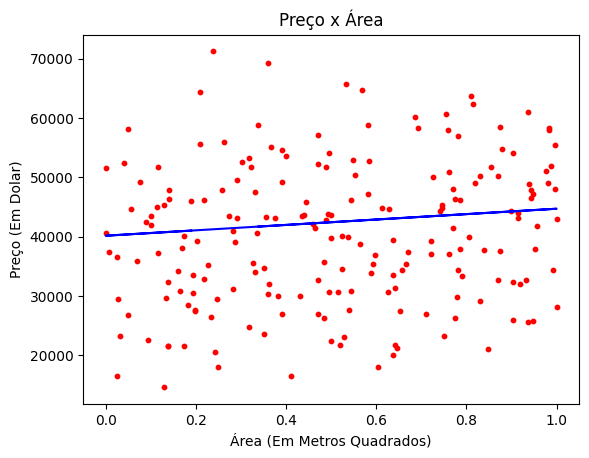

In [7]:
plt.scatter(XTestSimple["area"], dfResultadoLinear["precos"], color = 'red', s=10) #[inicio:fim:step] 1% das amostras
plt.plot(XTestSimple["area"], dfResultadoLinear["Predição"], color='blue')
plt.title("Preço x Área")
plt.xlabel("Área (Em Metros Quadrados)")
plt.ylabel("Preço (Em Dolar)")
plt.show()

# Visualização Polinomial

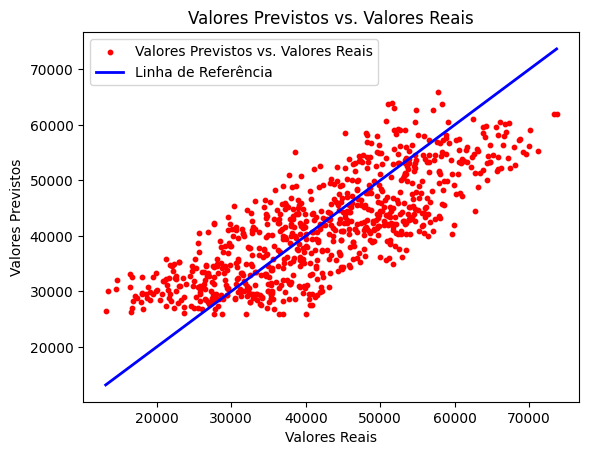

In [8]:
plt.close()
plt.scatter(dfResultadoPolinomial["precos"], dfResultadoPolinomial["Predição"], color='red', label='Valores Previstos vs. Valores Reais', s=10)
plt.plot([min(dfResultadoPolinomial["precos"]), max(dfResultadoPolinomial["precos"])], [min(dfResultadoPolinomial["precos"]), max(dfResultadoPolinomial["precos"])], color='blue', linewidth=2, label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Valores Previstos vs. Valores Reais')
plt.show()

# Visualização Linear Múltipla

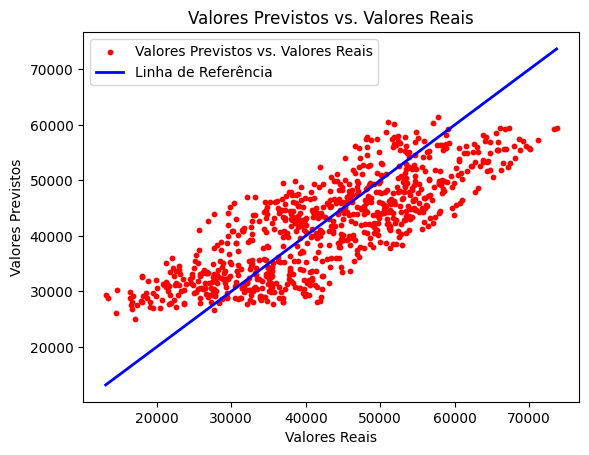

In [9]:
plt.close()
plt.scatter(dfResultadoLinearMultipla["precos"], dfResultadoLinearMultipla["Predição"], color='red', label='Valores Previstos vs. Valores Reais', s=10)
plt.plot([min(dfResultadoLinearMultipla["precos"]), max(dfResultadoLinearMultipla["precos"])], [min(dfResultadoLinearMultipla["precos"]), max(dfResultadoLinearMultipla["precos"])], color='blue', linewidth=2, label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Valores Previstos vs. Valores Reais')
plt.show()

# Relatório
## Coleta de Dados
* Foi selecionada uma base de dados referente a um Estudo de Mercado sobre preços de imóveis disponível em (https://www.kaggle.com/code/brunohcrema/estudo-de-mercado-regress-o-linear/input).
* O objetivo é realizar previsões de preços dos imóveis (variável dependente).
* Na abordagem da regressão linear, a variável independente escolhida foi a área do imóvel.
* Já para as regressões múltiplas, todas as outras colunas foram consideradas.

## Pré-processamento dos Dados
* Não houve registros ausentes na base de dados.
* Foi feita a divisão dos dados em dois conjuntos distintos de treino e teste. Um com apenas uma variável independente para a regressão linear, e outro com todas as variáveis restantes, mantendo uma proporção de 80/20.
* No caso do conjunto utilizado para a regressão linear, não foi necessário normalizar os dados, visto que havia apenas uma variável independente.
* Para o conjunto das regressões múltiplas, embora não tenhamos encontrado variáveis categóricas, mas caso houvesse seria aplicada a transformação em variáveis dummy utilizando one-hot encoding. Além disso, as demais colunas foram normalizadas utilizando o min-max scaler.

## Avaliação dos Modelos
* Os resultados da regressão linear demonstraram grande disparidade, com RMSE de 12097.95 e MAE de 9949.64. Estes indicam um erro considerável, posicionando-a como a menos eficaz dentre as regressões testadas.
* Já a regressão polinomial apresentou resultados muito mais precisos, com RMSE de 7796.77 e MAE de 6508.73, indicando um erro consideravelmente menor. Esta se destacou como a segunda melhor entre as regressões avaliadas.
* Por fim, a regressão linear múltipla também apresentou resultados bastante precisos, com RMSE de 7417.65 e MAE de 6220.55, demonstrando erros ainda menores que a regressão polinomial. Sua performance foi notavelmente superior à regressão linear.